In [1]:
"""
Needed imports for this exercise
"""

import os
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

####**1.** Debe cargar el archivo en un DataFrame, desplegando la cantidad de registros (filas) y la cantidad de características presentes en la base de datos, debe eliminar del DataFrame las siguientes columnas: id, fecha_inicio, fecha_ultima_accion, ppei1, ppei2, ppei3 y ppei4, para aquellas columnas cuyos nombres vengan con espacios en blanco al comienzo, debe quitar esos espacios y se requiere eliminar de los valores almacenados en la columna gen el carácter punto con el cual vienen algunos géneros.

In [2]:
"""
Try reading data stored in an excel file
"""

import os
import pandas as pd
from google.colab import files

excel_file_name = "SERNAC_bbdd-satisfaccion-fin-reclamos.xlsx"

# Check if the file exists in Google Colab
if not os.path.exists(excel_file_name):
    # Upload the file to Google Colab
    uploaded = files.upload()

try:
    # Read the Excel file into a DataFrame
    df = pd.read_excel(excel_file_name)
except Exception as e:
    # If reading as an Excel file raises an error, it's not an Excel file
    print("El archivo no es del tipo Excel.")
    print(e)

In [3]:
"""
Print the # of rows and columns in the Dataframe
"""

# Get the number of rows and columns
num_rows, num_cols = df.shape
print(f"Número de filas: {num_rows}")
print(f"Número de columnas: {num_cols}")

print("\n")

# Print the column names
print(df.columns)

Número de filas: 4793
Número de columnas: 27


Index(['id', 'fecha_inicio', 'mes_reclamo', 'fecha_ultima_accion', 'pex',
       'p1a', 'p1b', 'pinst', 'ppei1', 'ppei2', 'ppei3', 'ppei4', 'p2', 'p3',
       'p4a', 'p4b', 'p4c', 'nps', 'pgen', 'gen', 'region', 'educ', 'edad',
       'ocup', 'ingreso', 'sitdisc', 'indg'],
      dtype='object')


In [4]:
"""
Remove id, fecha_inicio, fecha_ultima_accion, ppei1, ppei2, ppei3 y ppei4
"""

print("\n")

# Remove columns
columns_to_remove = [
    "id",
    "fecha_inicio",
    "fecha_ultima_accion",
    "ppei1",
    "ppei2",
    "ppei3",
    "ppei4",
]

existing_columns = [col for col in columns_to_remove if col in df.columns]

# Check if we have columns to remove in the original dataframe
if len(existing_columns) > 0:
    df = df.drop(columns=existing_columns)
    print("Columnas eliminadas:", existing_columns)
else:
    print("Las columnas a eliminar ya fueron eliminadas, no hay columnas para eliminar.")

# Check columns
print(df.columns)



Columnas eliminadas: ['id', 'fecha_inicio', 'fecha_ultima_accion', 'ppei1', 'ppei2', 'ppei3', 'ppei4']
Index(['mes_reclamo', 'pex', 'p1a', 'p1b', 'pinst', 'p2', 'p3', 'p4a', 'p4b',
       'p4c', 'nps', 'pgen', 'gen', 'region', 'educ', 'edad', 'ocup',
       'ingreso', 'sitdisc', 'indg'],
      dtype='object')


In [5]:
"""
Remove leading spaces from column names
Remove the period character at the end of the 'gen' column
"""

# Remove leading spaces from column names
df.columns = df.columns.str.lstrip()

# Remove the period character at the end of the 'gen' column
if "gen" in df.columns:
    df["gen"] = df["gen"].str.rstrip(".")

# Verify the changes in the values of the 'gen' column
print(df["gen"].head())

0    Masculino
1     Femenino
2     Femenino
3     Femenino
4    Masculino
Name: gen, dtype: object


####**2.** Implemente una función en Python que reciba por parámetro un DataFrame y el género, para este ultimo los valores posibles son: Masculino, Femenino, No binario, Otro y Todos. Esta función debe resolver el NPS para el género solicitado, si es Todos devolverá el NPS considerando todos los registros.

In [6]:
def calculate_nps(df: pd.DataFrame, gender: str) -> float:
    """
    Calculate the NPS for the specified gender.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    gen (str): The gender to filter by. Possible values are:
                    'Masculino', 'Femenino', 'No binario', 'Otro', 'Todos'.

    Returns:
    float: The calculated NPS for the specified gender.
    """

    # Check of gender the sent gender is correct
    accepted_gender = ["Masculino", "Femenino", "No binario", "Otro", "Todos"]

    if gender not in accepted_gender:
        raise ValueError("Género incorrecto.")

    # Filter by gender
    if gender != "Todos":
        df_filtered = df[df["gen"] == gender]
    else:
        df_filtered = df

    # Ensure the 'nps' column is present
    if "nps" not in df_filtered.columns:
        raise ValueError("El DataFrame no contiene una columna 'nps'.")

    # Calculate NPS
    total_responses = df_filtered.shape[0]

    # There are no responses
    if total_responses == 0:
        return 0

    # Obtain promoters and detractor for the calculation
    promoters = df_filtered[df_filtered["nps"] >= 9].shape[0]
    detractors = df_filtered[df_filtered["nps"] <= 6].shape[0]

    promoters_percentage = (promoters / total_responses) * 100
    detractors_percentage = (detractors / total_responses) * 100

    # return calculated nps
    nps = promoters_percentage - detractors_percentage
    return round(nps, 2)

In [7]:
"""
Call the function calculate_nps
"""

try:
    # With gender error should return an exception
    # calculate_nps(pd, "Incorrecto")

    # With Masculino gender
    nps_male = calculate_nps(df, "Masculino")
    print(f"NPS para Hombres: {nps_male}")

    # With Femenino gender
    nps_female = calculate_nps(df, "Femenino")
    print(f"NPS para Mujeres: {nps_female}")

    # With No binario gender
    nps_non_binary = calculate_nps(df, "No binario")
    print(f"NPS para No binario: {nps_non_binary}")

    # With Otro gender
    nps_other = calculate_nps(df, "Otro")
    print(f"NPS para Otro: {nps_other}")

    # All the genders Todos
    nps_all = calculate_nps(df, "Todos")
    print(f"NPS para Todos: {nps_all}")

except ValueError as e:
    print(e)

NPS para Hombres: 13.41
NPS para Mujeres: 14.9
NPS para No binario: -37.5
NPS para Otro: -37.5
NPS para Todos: 13.73


####**3.** Muestre la cantidad de registros para cada categoría de edad y nivel de sueldo disponible, donde la categoría de edad estará en las filas y el sueldo en las columnas

In [8]:
# Create a pivot table for this excercice
pivot_table = df.pivot_table(
    index="edad", columns="ingreso", aggfunc="size", fill_value=0
)

# Show the pivot table
print("Cantidad de registros para cada categoría de edad y sueldo disponible:")
pivot_table

Cantidad de registros para cada categoría de edad y sueldo disponible:


ingreso,$1.100.000 o más,Entre $300.001 y $399.999,Entre $400.000 y $599.999,Entre $600.000 y $1.099.000,Menos de $300.000
edad,,,,,
18 a 29 años.,86,31,67,118,137
30 a 44 años.,868,82,260,519,177
45 a 64 años.,803,107,269,498,211
65 años o más.,162,54,121,147,76


####**4.** Despliegue las top "N" Regiones que presentan mayor cantidad de reclamos en que el cliente "No soluciono su reclamo" ordenadas de mayor a menor, debe mostrar el nombre de la región junto con la cantidad de observaciones que cumplan con lo requerido, N es un valor que si se cambia en el código debe devolver la cantidad que se requiere

In [10]:
def top_regions_unresolved_complaints(
    df: pd.DataFrame, top_regions: int
) -> pd.DataFrame:
    """
    Get the top N regions with the highest number of unresolved complaints

    Parameters:
    df (pd.DataFrame): The input DataFrame
    number_regions (int): The number of top regions to retrieve

    Returns:
    pd.DataFrame: A DataFrame containing the top N regions with unresolved complaints and their counts
    """

    # Remove the period character at the end of the 'p2' column
    if "p2" in df.columns:
        df["p2"] = df["p2"].str.rstrip(".")

    filter_by = "No solucionó su Reclamo"
    added_column = "Cantidad de Reclamos"

    # Filter the data to include only complaints where the status is 'No soluciono su reclamo'
    df_unresolved_complaints = df[df["p2"] == "No solucionó su Reclamo"]

    # Group the data by region and count the number of complaints in each region
    df_by_region = (
        df_unresolved_complaints.groupby("region").size().reset_index(name=added_column)
    )

    # Sort the regions based on the number of complaints in descending order
    df_sorted_complaints = df_by_region.sort_values(by=added_column, ascending=False)

    # Select the top N regions and reset the index to ensure it has new sequential indexes
    return df_sorted_complaints.head(top_regions).reset_index(drop=True)

In [11]:
# Change this value for top regions you desire to show
top_regions = 5
# Execute function
df_top_n_regions = top_regions_unresolved_complaints(df, top_regions)
# Print results
df_top_n_regions

,region,Cantidad de Reclamos
0,Región Metropolitana de Santiago.,1093
1,Región de Valparaíso.,217
2,Región del Biobío.,145
3,Región del Libertador General Bernardo O’Higgins.,90
4,Región de Los Lagos.,81


####**5.** Desarrolle una función que reciba por parámetro un DataFrame y el nombre de una columna que pertenezca a este, para datos discretos que puede ser: gen, región, educ, edad, ocup, ingreso, sitdisc o indg. La función debe mostrar un gráfico de barras con la cantidad de reclamos completamente solucionados para cada categoría de la columna recibida por parámetro

In [12]:
def plot_completed_complaints_by_category(df: pd.DataFrame, column_name: str) -> None:
    """
    Plot the number of fully resolved complaints for each category in the specified column

    Parameters:
    df (pd.DataFrame): The input DataFrame
    column_name (str): The name of the column in the DataFrame representing the category

    Returns:
    None
    """

    # Check the column name
    accepted_columns = [
        "gen",
        "region",
        "educ",
        "edad",
        "ocup",
        "ingreso",
        "sitdisc",
        "indg",
    ]

    if column_name not in accepted_columns:
        raise ValueError("Columna seleccionada no corresponde verifiqué")

    # Check if the column exists in the data frame
    if column_name not in df.columns:
        raise ValueError("Columna no existe en el Data Frame")

    # Remove the period character at the end of the 'p2' column
    if "p2" in df.columns:
        df["p2"] = df["p2"].str.rstrip(".")

    filter_by = "Solucionó completamente su Reclamo"

    # Filter the data to include only complaints where the status is 'Solucionó completamente su Reclamo'
    df_fully_resolved_complaints = df[df["p2"] == filter_by]

    # Group the data by the specified column and count the number of fully resolved complaints in each category
    df_resolved_by_category = (
        df_fully_resolved_complaints.groupby(column_name)
        .size()
        .reset_index(name=filter_by)
    )

    # Sort the DataFrame by the count of fully resolved complaints in descending order
    df_resolved_by_category = df_resolved_by_category.sort_values(
        by=filter_by, ascending=False
    )

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(
        df_resolved_by_category[column_name],
        df_resolved_by_category[filter_by],
        color="skyblue",
    )
    plt.xlabel(column_name)
    plt.ylabel("Número de reclamos solucionados")
    plt.title("Categorizado por " + column_name)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

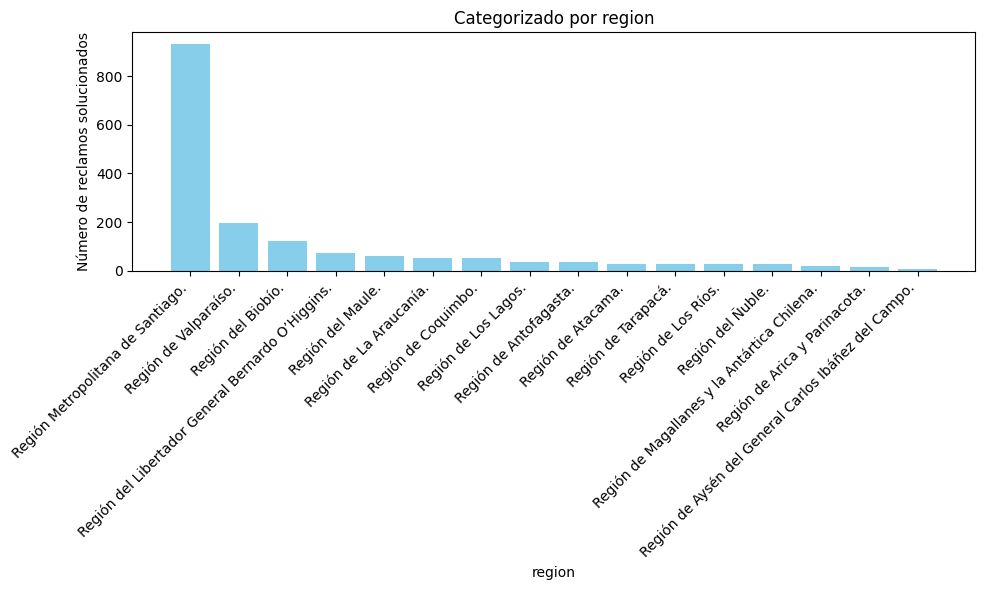

In [13]:
try:
    # Completed complaints for one of this columns
    # [gen, región, educ, edad, ocup, ingreso, sitdisc, indg]
    column_name = "region"

    # Will print the plot
    plot_completed_complaints_by_category(df, column_name)
except ValueError as e:
    print(e)

####**6.** Para el mes en que se genera la mayor cantidad de reclamos, independiente si hay o no solución, muestre en forma ordenadas para cada género de mayor a menor la cantidad de reclamos realizada por clientes con nivel de estudios “Superior Universitaria Completa” y compare esta cantidad con aquellos con nivel de estudios “Básica incompleta”, concluya a que puede asociar este resultado

In [14]:
def get_complaints_by_education(df: pd.DataFrame, education: str) -> pd.DataFrame:
    """
    Get the top number of complaints by eduction

    Parameters:
    df (pd.DataFrame): The input DataFrame
    number_regions (int): The number of top regions to retrieve

    Returns:
    pd.DataFrame: A DataFrame containing the number of complaints by education
    """

    # The accepted educations to filter
    accepted_educations = [
        "Superior universitaria completa",
        "Básica incompleta",
    ]

    if education not in accepted_educations:
        raise ValueError("Educacion seleccionada no corresponde verifiqué")

    # Check if the column exists in the data frame
    if "educ" not in df.columns:
        raise ValueError("Columna [educ] no existe en el Data Frame")

    # Remove the period character at the end of the 'educ' column
    if "educ" in df.columns:
        df.loc[:, "educ"] = df["educ"].str.rstrip(".")

    column_name = "Cantidad de Reclamos"

    # Filter the data for education level
    df_education = df[df["educ"] == education]

    # Group the data by gender and count the number of complaints
    df_education_by_gender = (
        df_education.groupby("gen").size().reset_index(name=column_name)
    )

    # Sort the regions based on the number of complaints in descending order
    df_sorted_education = df_education_by_gender.sort_values(
        by=column_name, ascending=False
    )

    return df_sorted_education.reset_index(drop=True)

In [15]:
# First we check the data
df_check_data = df.groupby("mes_reclamo").size().reset_index(name="Mes Reclamo")
df_check_data = df_check_data.sort_values(
    by="Mes Reclamo", ascending=False, ignore_index=True
)

try:
    # Get the month with the highest number of complaints - Since the analized data should be 1
    max_complaints_month = df["mes_reclamo"].value_counts().idxmax()

    # Get the month with more complaints Data Frame
    df_complaints_month = df[df["mes_reclamo"] == max_complaints_month]

    # Filter the data for clients with 'Superior universitaria completa' education level
    df_superior_education = get_complaints_by_education(
        df_complaints_month, "Superior universitaria completa"
    )

    # Filter the data for clients with 'Basica incompleta' education level
    df_basic_education = get_complaints_by_education(
        df_complaints_month, "Básica incompleta"
    )

    print("Superior universitaria completa:")
    print(df_superior_education)

    print("\n")

    print("Básica incompleta:")
    print(df_basic_education)

except ValueError as e:
    print(e)

Superior universitaria completa:
          gen  Cantidad de Reclamos
0   Masculino                   186
1    Femenino                   165
2        Otro                     4
3  No binario                     2


Básica incompleta:
         gen  Cantidad de Reclamos
0   Femenino                     2
1  Masculino                     2



**Las personas con educación "Superior Universitaria Completa" tienden a presentar más reclamos que aquellas con "Básica Incompleta" por varios motivos:**

Tienen mejor conocimiento de sus derechos y los procedimientos para presentar quejas.

Esperan niveles más altos de calidad en productos y servicios.

Cuentan con mejor acceso a recursos tecnológicos que facilitan la presentación de reclamos.

Suelen consumir más productos y servicios, aumentando la probabilidad de encontrar problemas.
